In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
%matplotlib inline

In [3]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

In [4]:
# Import CSV Tables
df_comments = pd.read_csv('spiegel_comments_sentiment.csv',index_col=0) # import CSV Auswertung Threads
df_article_spiegel = pd.read_csv('df_gesamt.csv', index_col=0) # Import CSV Auswertung Artikel-Spiegel
df_article_bild = pd.read_csv('df_gesamt_bild.csv', index_col=0) # Import CSV Auswertung Artikel-Bild

# RESET Index
df_comments.set_index('Id',inplace = True)
df_article_spiegel.set_index('Id',inplace = True)
df_article_bild.set_index('Id',inplace=True)

# Join Tables
df_spiegel = df_article_spiegel.join(df_comments)

# Convertings
to_drop_spiegel = df_spiegel[(df_spiegel['lesbarkeit']<0) | (df_spiegel['lesbarkeit']>100)] # drop rows Lesbarkeit kleiner 0 oder größer 100
df_spiegel.drop(to_drop_spiegel.index, inplace = True)

df_bild = df_article_bild
to_drop_bild = df_bild[(df_bild['lesbarkeit']<0) | (df_bild['lesbarkeit']>100)] # drop rows Lesbarkeit kleiner 0 oder größer 100
df_bild.drop(to_drop_bild.index, inplace = True)




In [5]:
df_bild.describe()

,articles_counts,day,lesbarkeit,month,polarity,subjectivity,thread_counts,word_counts,year
count,98.0,98.000000,98.000000,98.000000,98.000000,98.000000,98.0,98.000000,98.0
mean,1.0,17.142857,43.896531,9.673469,0.036057,0.123487,0.0,307.826531,2019.0
std,0.0,6.013730,14.278916,3.248395,0.259439,0.168485,0.0,225.784179,0.0
min,1.0,12.000000,5.300000,1.000000,-1.000000,0.000000,0.0,26.000000,2019.0
25%,1.0,12.000000,35.382500,10.000000,-0.090265,0.003125,0.0,120.500000,2019.0
50%,1.0,15.000000,44.170000,11.000000,0.048237,0.072556,0.0,281.500000,2019.0
75%,1.0,21.000000,53.387500,12.000000,0.171275,0.166667,0.0,442.000000,2019.0
max,1.0,30.000000,72.530000,12.000000,1.000000,1.000000,0.0,1037.000000,2019.0


C:\Users\Stefan Kostelecky\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


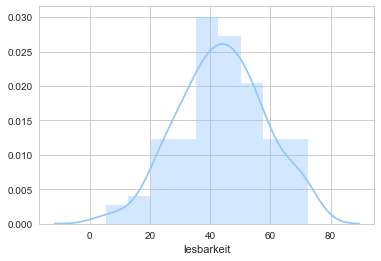

In [6]:
x = sns.distplot(df_bild.lesbarkeit.dropna())

In [ ]:
# Anzahl Artikel 
grouped = df.groupby('year').agg({'word_counts':[sum,min,max, np.mean, np.median]})
grouped.columns = ['_'.join(x) for x in grouped.columns]
grouped

In [25]:
df_bild.groupby('month').word_counts.describe().unstack(1)

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,2.0,212.000000,158.391919,100.0,156.00,212.0,268.00,324.0
2,4.0,295.000000,242.459619,109.0,137.50,215.0,372.50,641.0
3,5.0,338.600000,324.442291,57.0,89.00,167.0,651.00,729.0
4,2.0,188.000000,195.161472,50.0,119.00,188.0,257.00,326.0
5,2.0,112.000000,49.497475,77.0,94.50,112.0,129.50,147.0
6,5.0,187.400000,126.044833,33.0,130.00,157.0,253.00,364.0
8,2.0,236.500000,167.584307,118.0,177.25,236.5,295.75,355.0
9,2.0,279.500000,207.182287,133.0,206.25,279.5,352.75,426.0
10,2.0,291.000000,287.085353,88.0,189.50,291.0,392.50,494.0


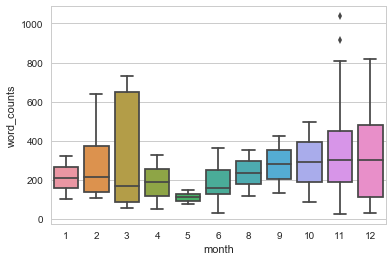

In [7]:
ax = sns.boxplot(x="month", y="word_counts", data=df_bild)